<a href="https://colab.research.google.com/github/strongeryoung/class_SmartDataAnalysis/blob/main/Time_Series_2_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
# from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy import stats

In [ ]:
pip install xmltodict

In [ ]:
# coding: utf-8
import requests 	  # API 요청할 때 쓰는 라이브러리
import xmltodict 	  # xml형태를 dictionary {'a':1,'b':23}
import json  # json을 쓰기위함
import os
import bs4

from datetime import *
from urllib.parse import urlencode, quote_plus, unquote

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm


%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import seaborn as sns

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# [출처] [파이썬] colab에서 plt 한글깨짐 해결|작성자 서울시립대 통계학과

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
# [출처] [파이썬] colab에서 plt 한글깨짐 해결|작성자 서울시립대 통계학과

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 본인의 경로를 인식 시킨다 !!! (중요)
os.chdir('/content/drive/MyDrive/Smart_Data_Analysis_Class_202302_비공개/Week_6')

# .py 파일의 내용을 전부 import 한다
from KEYS import *

In [ ]:
def evaluation_tr(Y_real, Y_pred, graph_on=False):

    graph_on = True
    Y_real = Y_train_re
    Y_pred = pred_tr_sarimax

    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]

    Y_pred_df = pd.DataFrame(Y_pred )
    Y_pred_df.index = Y_real.index
    Y_pred_df.columns = ['prediction']

    if graph_on == True:
        df = pd.concat([Y_real, Y_pred_df], axis=1)
        df = df.iloc[13:]
        df.plot(kind='line', figsize=(20,6), xlim=(df.index[12:].min(), df.index[12:].max()), linewidth=3, fontsize=15)
        plt.title('Time Series of Data', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)

    MAE = abs(Y_real.iloc[13:].values.flatten() - Y_pred_df.iloc[13:].values.flatten()).mean()
    MSE = ((Y_real.iloc[13:].values.flatten() - Y_pred_df.iloc[13:].values.flatten())**2).mean()
    MAPE = (abs(Y_real.iloc[13:].values.flatten() - Y_pred_df.iloc[13:].values.flatten())/Y_real.iloc[13:].values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.iloc[13:].values.flatten() - Y_pred_df.iloc[13:].values.flatten(), index=Y_pred_df.index[13:], columns=['Error'])

    return Score, Residual


def evaluation_te(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]

    tem_df = pd.DataFrame(Y_pred )
    tem_df.index = Y_real.index
    tem_df.columns = ['prediction']

    if graph_on == True:
        pd.concat([Y_real, tem_df], axis=1).plot(kind='line', figsize=(20,6), xlim=(Y_real.index.min(),Y_real.index.max()), linewidth=3, fontsize=15)
        plt.title('Time Series of Data', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)

    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred.values.flatten(), index=Y_real.index, columns=['Error'])

    return Score, Residual


### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation_tr(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation_te(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te


### Error analysis
def stationarity_adf_test(Y_Data, col_name):
    if len(col_name) == 0:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data)[0:2],
                                     index=['Statistics', 'p_value'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data)[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data)[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    else:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data[col_name])[0:2],
                                     index=['Statistics', 'p_value'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data[col_name])[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data[col_name])[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])

    return Stationarity_adf

def error_analysis(Y_Data, Target_name, X_Data, graph_on=False):

    for x in Target_name:
        Target_name = x
    X_Data = X_Data.loc[Y_Data.index]

    if graph_on == True:
        ##### Error Analysis(Plot)
        Y_Data['RowNum'] = Y_Data.reset_index().index

        # Stationarity(Trend) Analysis
        sns.set(palette="muted", color_codes=True, font_scale=2)
        sns.lmplot(x='RowNum', y=Target_name, data=Y_Data, fit_reg='True', height=5.2, aspect=2, ci=99, sharey=True)

        # xticks와 yticks의 글자 크기 조절
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # X, Y 레이블 폰트 크기 조절
        plt.xlabel('Time', fontsize=14)  # X 레이블 폰트 크기 조절
        plt.ylabel('Error', fontsize=14)  # Y 레이블 폰트 크기 조절

        del Y_Data['RowNum']

        # Normal Distribution Analysis
        figure, axes = plt.subplots(figsize=(12,8))
        sns.distplot(Y_Data[Target_name], norm_hist='True', fit=stats.norm, ax=axes)
        # xticks와 yticks의 글자 크기 조절
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        # X, Y 레이블 폰트 크기 조절
        plt.xlabel('Error', fontsize=14)  # X 레이블 폰트 크기 조절
        plt.ylabel('Density', fontsize=14)  # Y 레이블 폰트 크기 조절

        # Autocorrelation Analysis
        figure, axes = plt.subplots(2,1,figsize=(12,5))
        sm.tsa.graphics.plot_acf(Y_Data[Target_name], lags=30, use_vlines=True, ax=axes[0])
        sm.tsa.graphics.plot_pacf(Y_Data[Target_name], lags=30, use_vlines=True, ax=axes[1])

        # xticks와 yticks의 글자 크기 조절
        axes[0].tick_params(axis='both', which='major', labelsize=12)
        axes[1].tick_params(axis='both', which='major', labelsize=12)

        # x축 레이블 및 y축 레이블의 제목 글자 크기 조절
        axes[0].set_xlabel('Lags', fontsize=12)
        axes[0].set_ylabel('ACF', fontsize=12)
        axes[1].set_xlabel('Lags', fontsize=12)
        axes[1].set_ylabel('PACF', fontsize=12)

        #타이틀 폰트 크기 조절
        axes[0].set_title('ACF Plot', fontsize=12)
        axes[1].set_title('PACF Plot', fontsize=12)
        # 서브플롯 간격 조절
        plt.subplots_adjust(hspace=1.0)  # 수직 간격 조절

    ##### Error Analysis(Statistics)
    # Checking Stationarity
    # Null Hypothesis: The Time-series is non-stationalry
    Stationarity_adf = stationarity_adf_test(Y_Data, Target_name)

    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Y_Data[Target_name])],
                              index=['Normality'], columns=['Statistics', 'p_value']).T

    # # Checking for Autocorrelation
    # # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,20,30])['lb_stat'], columns=['Test Statistics']),
                                  pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,20,30])['lb_pvalue'], columns=['p_value'])], axis=1).T

    Autocorrelation = sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,20,30])
    Autocorrelation.columns = ['Statistics', 'p_value']
    Autocorrelation_T = Autocorrelation.T
    Autocorrelation_T.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag20)', 'Autocorr(lag30)']

    # # # Checking Heteroscedasticity
    # # # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Y_Data[Target_name], X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], columns=['Statistics', 'p_value', 'Alternative']).T
    Score = pd.concat([Stationarity_adf, Normality, Autocorrelation_T, Heteroscedasticity], join='outer', axis=1)

    return Score.round(3)

In [ ]:
def module_for_datelist(start, end, end_month):

    y_list = []

    #start = 2015
    #end = 2024
    #end_month = 4

    month_list = ['01', '02', '03', '04','05','06','07','08','09','10', '11', '12']

    for y in range(start, end):
        if y != end-1:
            for j in month_list:
                y_value = str(y)+str(j)
                y_list.append(y_value)
        else:
            for j in month_list[:end_month]:
                y_value = str(y)+str(j)
                y_list.append(y_value)
    return y_list

In [ ]:
start = 2001
end = 2019
end_month = 12
dt_list = module_for_datelist(start, end, end_month)
dt_list

In [ ]:
key = KEYS['ODP']

# 국가코드  중국 (112)
# 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
row_list = [] # 행값
name_list = [] # 열이름값
value_list = [] #데이터값

country_code = 275

nat_cd = str(country_code)
ED_cd = 'E'

for dt in dt_list:
    #print(dt)
    url = f'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList?YM={dt}&NAT_CD={nat_cd}&ED_CD={ED_cd}&serviceKey={key}'
    response = requests.get(url)
    data = response.text
    # data = json.loads(data)

    # 깔끔한 출력 위한 코드
    # pp = pprint.PrettyPrinter(indent=4)

    ## 각 컬럼 값 ## (포털 문서에서 꼭 확인하세요)
    #bs4 사용하여 item 태그 분리
    xml_obj = bs4.BeautifulSoup(data,'lxml-xml')
    rows = xml_obj.findAll('item')
    # print(rows)

    # xml 안의 데이터 수집
    for i in range(0, len(rows)):
        # print(i)
        columns = rows[i].find_all()
        #첫째 행 데이터 수집
        for j in range(0,len(columns)):
            if i == 0:
                # 컬럼 이름 값 저장
                name_list.append(columns[j].name)
            # 컬럼의 각 데이터 값 저장
            value_list.append(columns[j].text)
        # 각 행의 value값 전체 저장
        row_list.append(value_list)

        # 데이터 리스트 값 초기화
        value_list=[]

data_frame = pd.DataFrame(row_list, columns=['항목', '구분', '코드', '국적', '입국자수', '나열순', '날짜'])
# 데이터 형태 확인
# data_frame.info()
data_frame['날짜']  = pd.to_datetime(data_frame['날짜'], format='%Y%m')+ pd.offsets.MonthEnd(1)
data_frame['입국자수'] = data_frame['입국자수'].astype('int64')
data_frame = data_frame.set_index('날짜')

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2005-01-31 to 2018-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   항목      168 non-null    object
 1   구분      168 non-null    object
 2   코드      168 non-null    object
 3   국적      168 non-null    object
 4   입국자수    168 non-null    int64 
 5   나열순     168 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.2+ KB


In [ ]:
data_frame

,항목,구분,코드,국적,입국자수,나열순
날짜,,,,,,
2005-01-31,방한외래관광객,E,275,미 국,34769,1
2005-02-28,방한외래관광객,E,275,미 국,31561,1
2005-03-31,방한외래관광객,E,275,미 국,42056,1
2005-04-30,방한외래관광객,E,275,미 국,49877,1
2005-05-31,방한외래관광객,E,275,미 국,48940,1
...,...,...,...,...,...,...
2018-08-31,방한외래관광객,E,275,미 국,77319,1
2018-09-30,방한외래관광객,E,275,미 국,78826,1
2018-10-31,방한외래관광객,E,275,미 국,98103,1


In [ ]:
data_frame

,항목,구분,코드,국적,입국자수,나열순
날짜,,,,,,
2005-01-31,방한외래관광객,E,275,미 국,34769,1
2005-02-28,방한외래관광객,E,275,미 국,31561,1
2005-03-31,방한외래관광객,E,275,미 국,42056,1
2005-04-30,방한외래관광객,E,275,미 국,49877,1
2005-05-31,방한외래관광객,E,275,미 국,48940,1
...,...,...,...,...,...,...
2018-08-31,방한외래관광객,E,275,미 국,77319,1
2018-09-30,방한외래관광객,E,275,미 국,78826,1
2018-10-31,방한외래관광객,E,275,미 국,98103,1


,Stationarity_adf
Statistics,1.270153
p_value,0.996436
Critical Value(1%),-3.473830
Maximum Information Criteria,2951.625818


<ipython-input-17-f093efbaef4b>:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


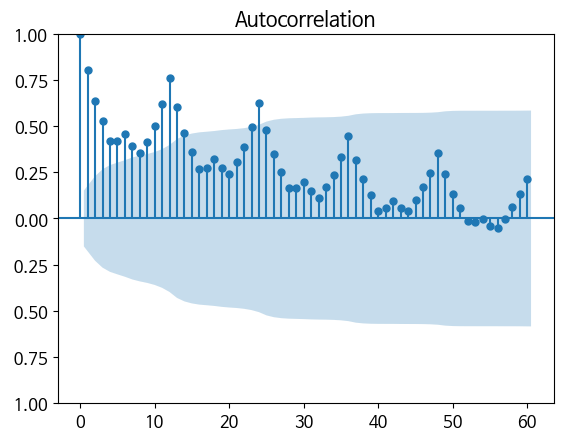

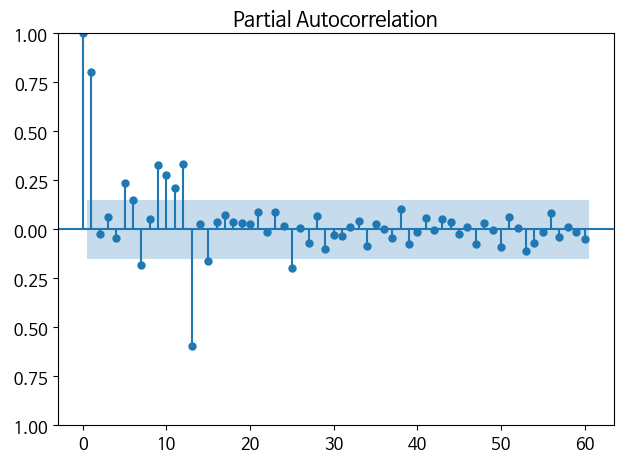

In [ ]:
## 정상성 테스트
### 미변환
us_data = data_frame[['입국자수']].copy()
display(stationarity_adf_test(us_data.values.flatten(), []))
sm.graphics.tsa.plot_acf(us_data, lags=60, use_vlines=True)
sm.graphics.tsa.plot_pacf(us_data, lags=60, use_vlines=True)
plt.tight_layout()
plt.show()

<Axes: xlabel='날짜'>

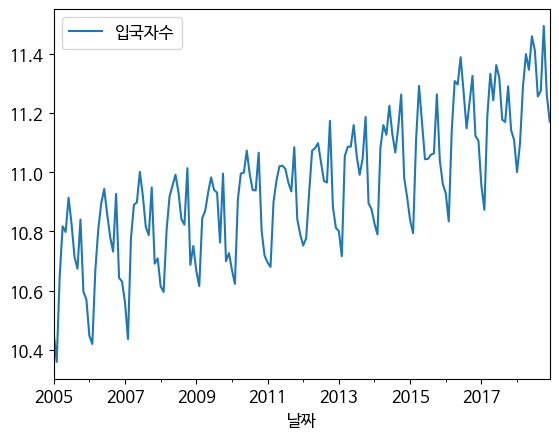

In [ ]:
np.log(us_data).plot()

,Stationarity_adf
Statistics,0.605848
p_value,0.987759
Critical Value(1%),-3.473830
Maximum Information Criteria,-438.225741


<ipython-input-19-1a8567b9aa36>:6: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


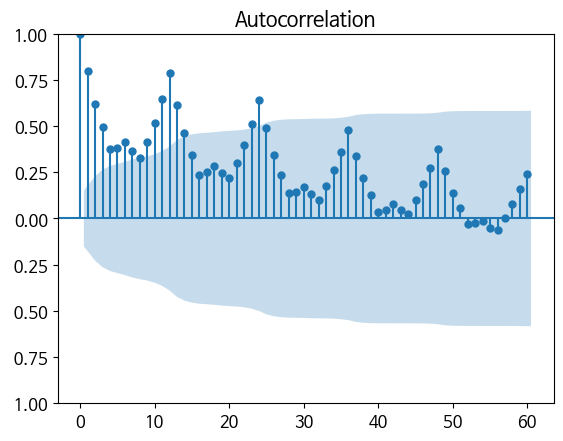

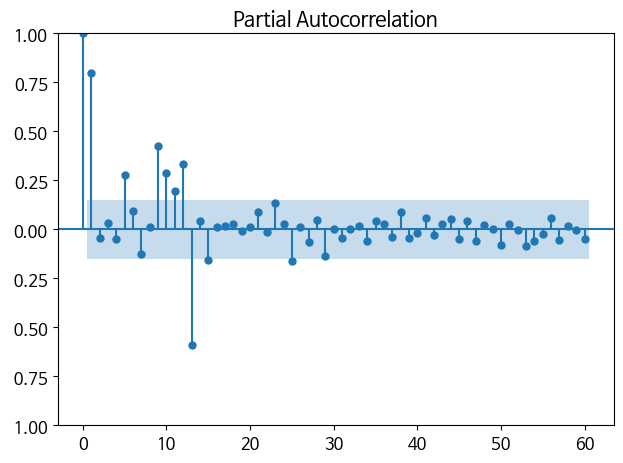

In [ ]:
# ### 로그 변환
us_log_data = np.log(us_data).copy()
display(stationarity_adf_test(us_log_data.values.flatten(), []))
sm.graphics.tsa.plot_acf(us_log_data, lags=60, use_vlines=True)
sm.graphics.tsa.plot_pacf(us_log_data, lags=60, use_vlines=True)
plt.tight_layout()
plt.show()

,Stationarity_adf
Statistics,-4.334118
p_value,0.000388
Critical Value(1%),-3.473830
Maximum Information Criteria,-435.903698


<ipython-input-20-22c9e317db33>:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


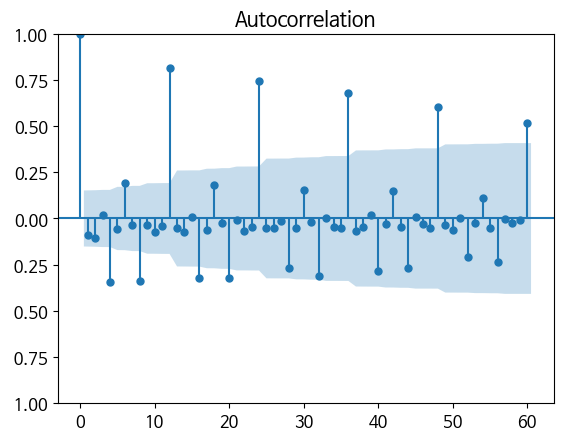

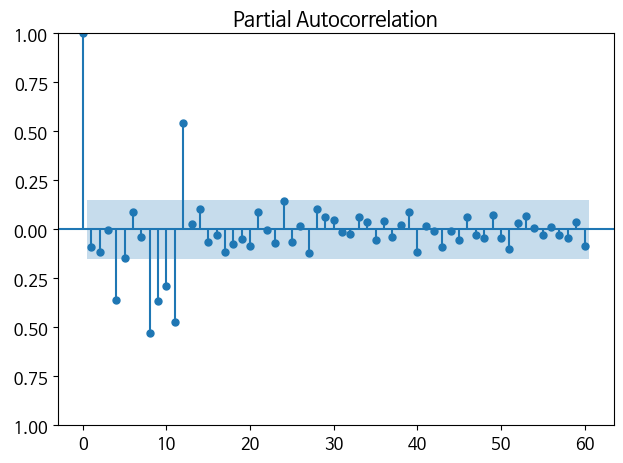

In [ ]:
## 추세 차분계수 설정
trend_order = 1

us_log_diff = us_log_data.diff(trend_order).dropna().copy()
display(stationarity_adf_test(us_log_diff.values.flatten(), []))
sm.graphics.tsa.plot_acf(us_log_diff, lags=60, use_vlines=True)
sm.graphics.tsa.plot_pacf(us_log_diff, lags=60, use_vlines=True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


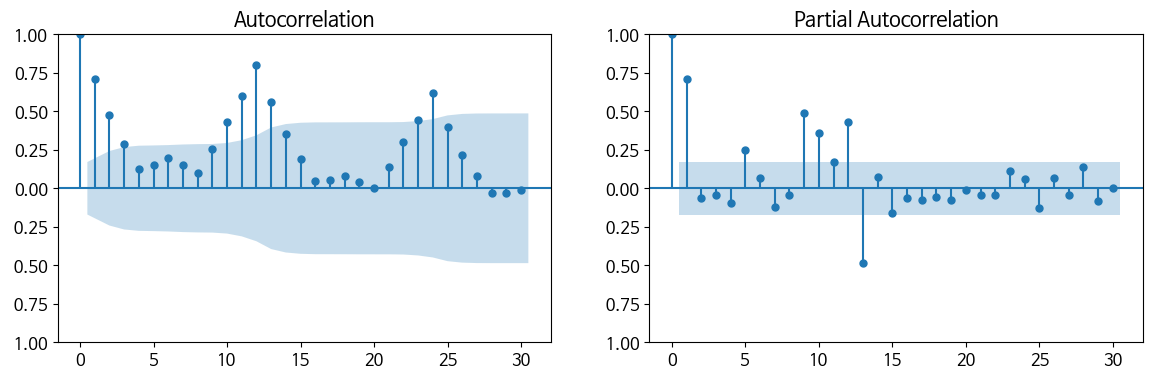

In [ ]:
## 최종 타겟 선정 및 Train/Test 데이터 분리
target_df = us_log_data.copy()
split_dt = '2016-01-01'
Y_train = target_df[target_df.index < split_dt]
Y_test = target_df[target_df.index >= split_dt]

plt.figure(figsize=(14,4))
sm.tsa.graphics.plot_acf(Y_train, lags=30, alpha=0.05, use_vlines=True, ax=plt.subplot(121))
sm.tsa.graphics.plot_pacf(Y_train, lags=30, alpha=0.05, use_vlines=True, ax=plt.subplot(122))
plt.show()

In [ ]:
# 모델링
# 0	1	2	1	0	2	12
seasonal_order = 12

## SARIMAX
logarithm, differencing = True, False

fit_ts_sarimax = sm.tsa.SARIMAX(Y_train, order=(1,1,1), seasonal_order=(1,0,1,seasonal_order), trend='c').fit()
display(fit_ts_sarimax.summary())
pred_train_sarimax = fit_ts_sarimax.predict()
pred_test_sarimax = fit_ts_sarimax.get_forecast(len(Y_test)).predicted_mean
pred_test_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test)).conf_int()

# ## 비정상성으로 변환
if logarithm:
    Y_train_re = np.exp(Y_train).copy()
    Y_test_re = np.exp(Y_test).copy()
    pred_tr_sarimax = np.exp(pred_train_sarimax).copy()
    pred_te_sarimax = np.exp(pred_test_sarimax).copy()
    pred_te_sarimax_ci = np.exp(pred_test_sarimax_ci).copy()

if differencing:
    pred_tr_sarimax = np.cumsum(pred_train_sarimax).copy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               입국자수   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 211.976
Date:                            Sat, 11 Nov 2023   AIC                           -411.953
Time:                                    07:38:13   BIC                           -394.702
Sample:                                01-31-2005   HQIC                          -404.943
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.932e-05   2.57e-05      1.143      0.253    -2.1e-05    7.96e-05
ar.L1          0.3838      0.101      3.805      0.000       0.186       0.582
ma.L1         -0.9810      0.034    -28.998      0.000      -1.047      -0.915
ar.S.L12       0.9829      0.010    100.971      0.000       0.964       1.002
ma.S.L12      -0.5957      0.103     -5.766      0.000      -0.798      -0.393
sigma2         0.0018      0.000     10.791      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                43.60
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                            -0.43
Prob(H) (two-sided):                  0.25   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,MAE,MSE,MAPE
Train,1691.168923,6.256700e+06,3.002071
Test,5716.427617,5.297287e+07,7.176204


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


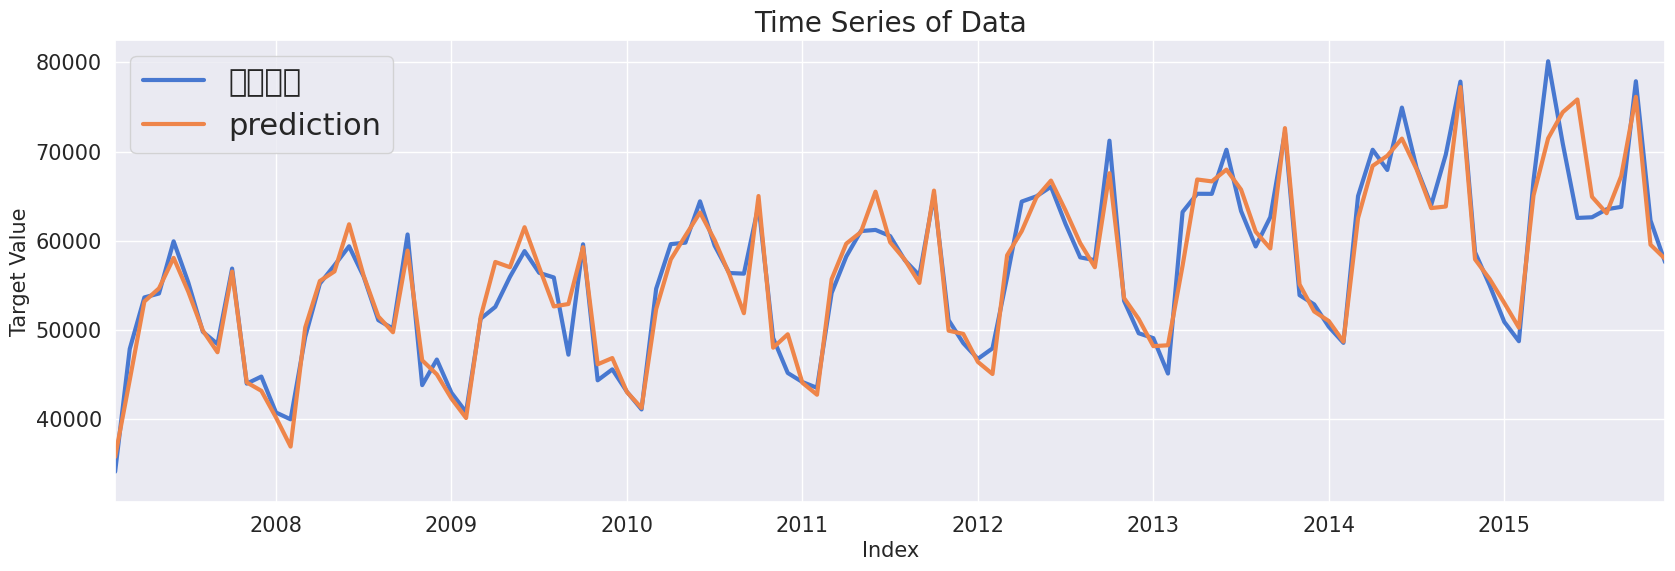

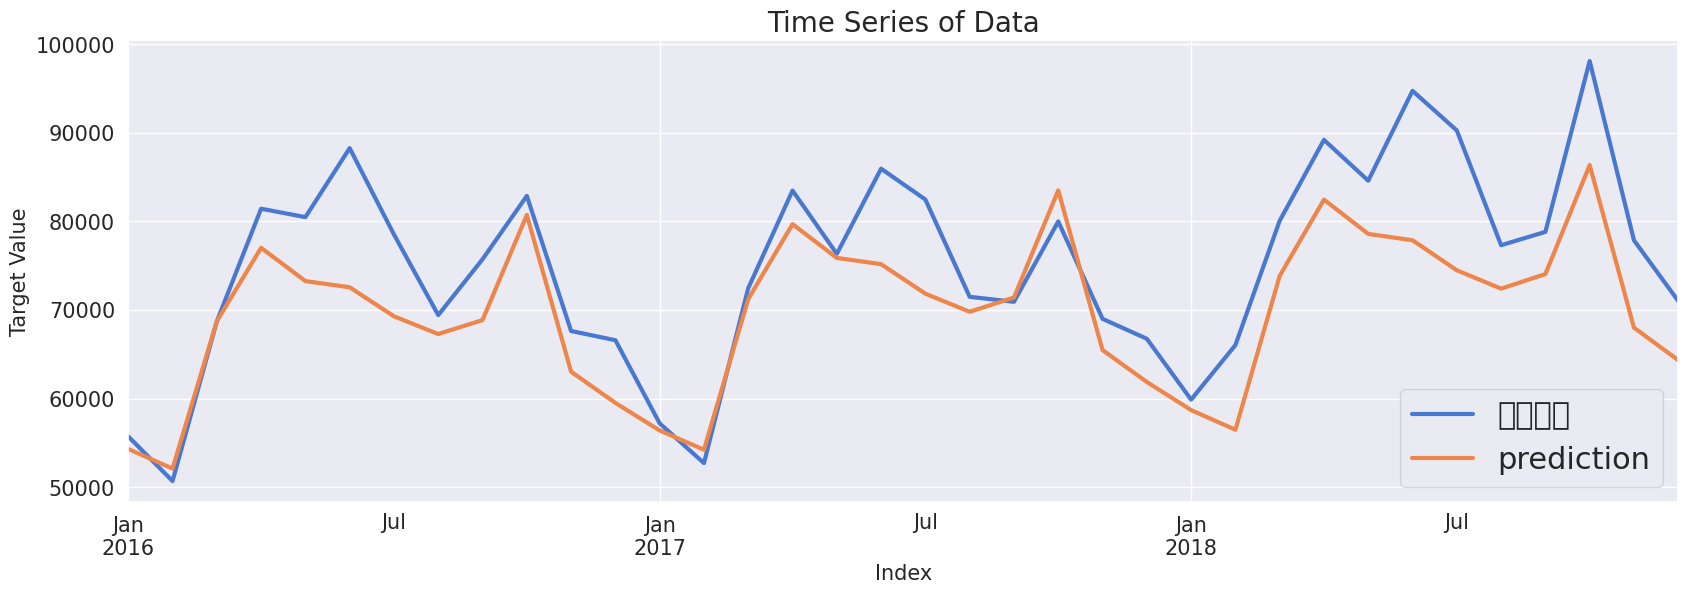

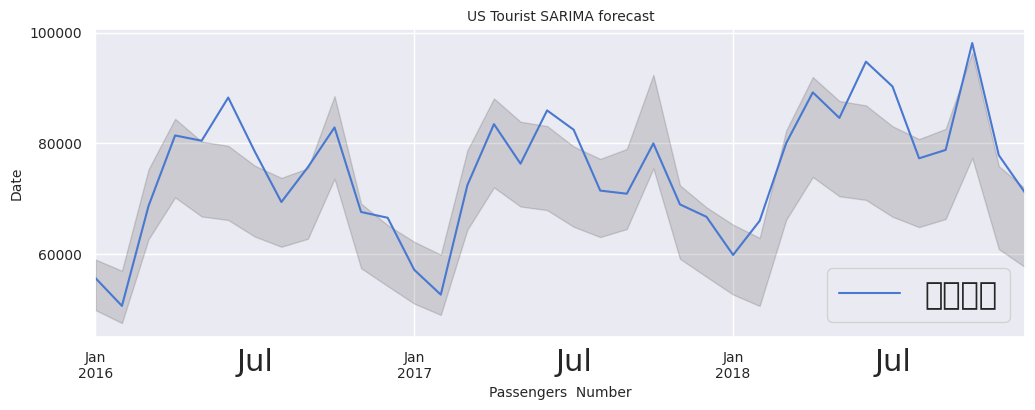

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
<ipython-input-9-ffb1d692b658>:110: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_Data[Target_name], norm_hist='True', fit=stats.norm, ax=axes)


,Stationarity_adf,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag20),Autocorr(lag30),Heteroscedasticity
Statistics,-6.429,0.91,0.371,9.062,21.974,42.655,2.223855
p_value,0.000,0.00,0.542,0.107,0.342,0.063,0.002696
Critical Value(1%),-3.489,NaN,NaN,NaN,NaN,NaN,NaN
Maximum Information Criteria,1949.039,NaN,NaN,NaN,NaN,NaN,NaN
Alternative,NaN,NaN,NaN,NaN,NaN,NaN,two-sided


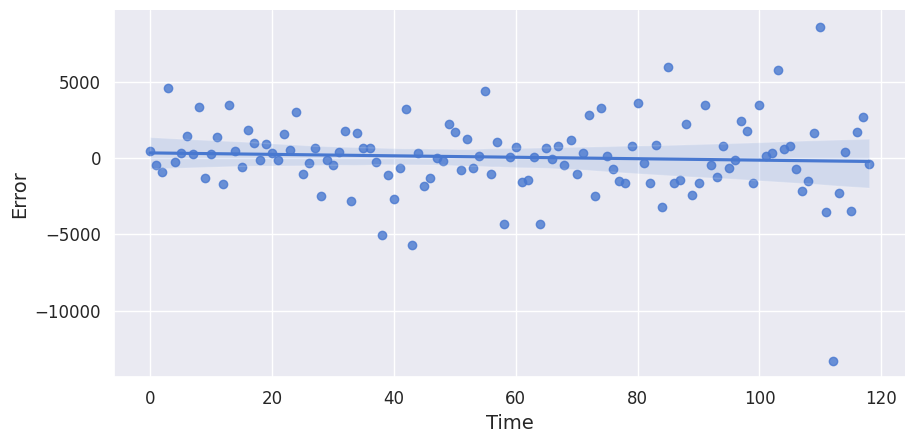

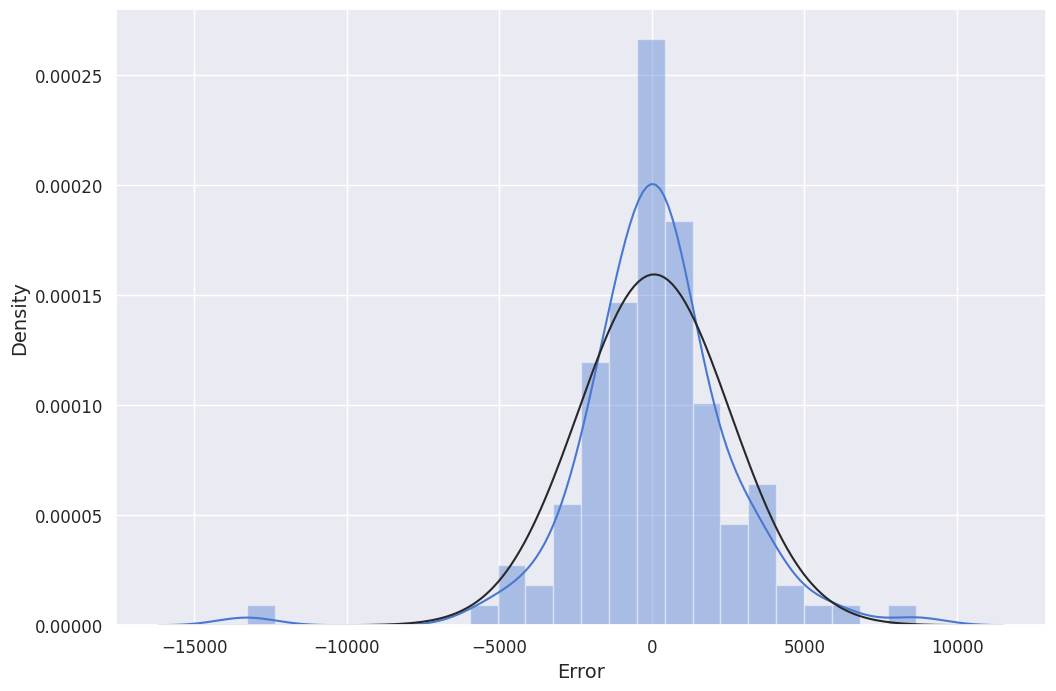

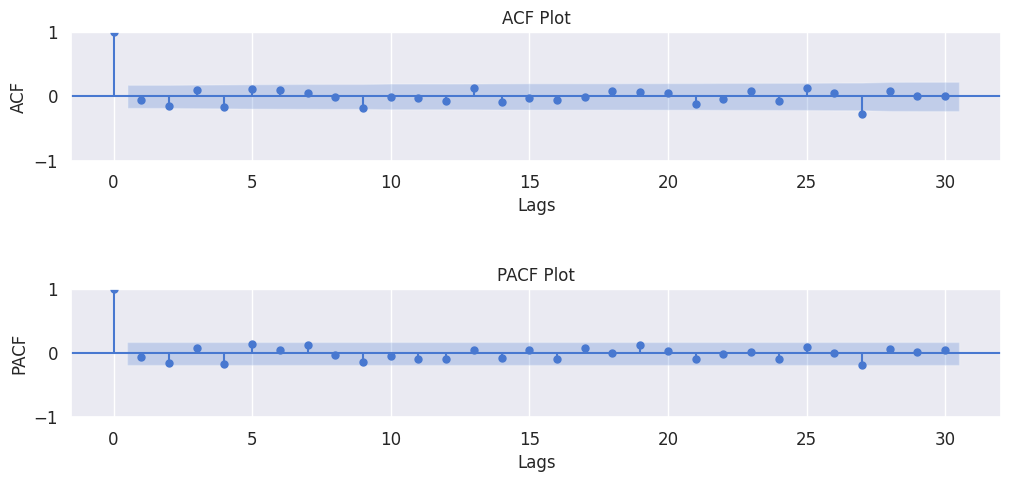

In [ ]:
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train_re, pred_tr_sarimax,
                                                                             Y_test_re, pred_te_sarimax, graph_on=True)
display(Score_ts_sarimax)

ax = pd.DataFrame(Y_test_re).plot(figsize=(12,4))

ax.fill_between(pd.DataFrame(pred_te_sarimax_ci, index=Y_test.index).index,
                pd.DataFrame(pred_te_sarimax_ci, index=Y_test.index).iloc[:,0],
                pd.DataFrame(pred_te_sarimax_ci, index=Y_test.index).iloc[:,1], color='k', alpha=0.15)


# Title 설정
ax.set_title("US Tourist SARIMA forecast", fontsize=10)
# x축 레이블 설정
ax.set_xlabel("Passengers  Number", fontsize=10)
# y축 레이블 설정
ax.set_ylabel("Date", fontsize=10)

# x축 눈금 값 설정
plt.xticks(fontsize=10)
# y축 눈금 값 설정
plt.yticks(fontsize=10)

plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_sarimax, ['Error'], Y_train, graph_on=True)

In [ ]:
from itertools import product
from tqdm.notebook import tqdm

In [ ]:
Y_train = Y_train

## Parameter Setting
p, q = range(0,2), range(0,2)
d = range(0,2)
P, Q = range(0,2), range(0,2)
D = range(0,2)
m = 12
trend_pdq = list(product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], m) for candi in list(product(P, D, Q))]

## SARIMAX
AIC = []
SARIMAX_order = []
for trend_param in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        try:
            result =sm.tsa.SARIMAX(Y_train, trend='c',
                                   order=trend_param, seasonal_order=seasonal_params).fit()
            print('Fit SARIMAX: trend_order={} seasonal_order={} AIC={}, BIC={}'.format(trend_param, seasonal_params, result.aic, result.bic, end='\r'))
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
        except:
            continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0], SARIMAX_order[AIC.index(min(AIC))][1]))




  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non

Fit SARIMAX: trend_order=(0, 0, 0) seasonal_order=(0, 0, 0, 12) AIC=-63.39379445838037, BIC=-57.62819061320763
Fit SARIMAX: trend_order=(0, 0, 0) seasonal_order=(0, 0, 1, 12) AIC=-170.23254070840886, BIC=-161.58413494064976
Fit SARIMAX: trend_order=(0, 0, 0) seasonal_order=(0, 1, 0, 12) AIC=-377.72065411963536, BIC=-372.1456706340713


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Fit SARIMAX: trend_order=(0, 0, 0) seasonal_order=(0, 1, 1, 12) AIC=-402.58070692663557, BIC=-394.21823169828946


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Fit SARIMAX: trend_order=(0, 0, 0) seasonal_order=(1, 0, 0, 12) AIC=-290.36871205252805, BIC=-281.7203062847689


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 0, 0) seasonal_order=(1, 0, 1, 12) AIC=-213.91137891287423, BIC=-202.38017122252876
Fit SARIMAX: trend_order=(0, 0, 0) seasonal_order=(1, 1, 0, 12) AIC=-397.5674720495302, BIC=-389.20499682118407


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 0, 0) seasonal_order=(1, 1, 1, 12) AIC=-401.25215955477404, BIC=-390.10219258364583
Fit SARIMAX: trend_order=(0, 0, 1) seasonal_order=(0, 0, 0, 12) AIC=-130.4760375218916, BIC=-121.8276317541325


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non

Fit SARIMAX: trend_order=(0, 0, 1) seasonal_order=(0, 0, 1, 12) AIC=-220.5496607922389, BIC=-209.01845310189344


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 0, 1) seasonal_order=(0, 1, 0, 12) AIC=-380.99352999642804, BIC=-372.6310547680819


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 0, 1) seasonal_order=(0, 1, 1, 12) AIC=-410.3182624383469, BIC=-399.1682954672187


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Fit SARIMAX: trend_order=(0, 0, 1) seasonal_order=(1, 0, 0, 12) AIC=-325.5817816405197, BIC=-314.0505739501742


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 0, 1) seasonal_order=(1, 0, 1, 12) AIC=-261.1201270689182, BIC=-246.70611745598632


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 0, 1) seasonal_order=(1, 1, 0, 12) AIC=-401.71222019667175, BIC=-390.56225322554354
Fit SARIMAX: trend_order=(0, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=-408.831184855913, BIC=-394.8937261420028
Fit SARIMAX: trend_order=(0, 1, 0) seasonal_order=(0, 0, 0, 12) AIC=-143.20712958279648, BIC=-137.45673493639418


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 0) seasonal_order=(0, 0, 1, 12) AIC=-225.41042651739411, BIC=-216.78483454779067
Fit SARIMAX: trend_order=(0, 1, 0) seasonal_order=(0, 1, 0, 12) AIC=-322.21635259891457, BIC=-316.6581056126915


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 0) seasonal_order=(0, 1, 1, 12) AIC=-355.38572775982055, BIC=-347.04835728048596


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 0) seasonal_order=(1, 0, 0, 12) AIC=-338.08240419043744, BIC=-329.45681222083397


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Fit SARIMAX: trend_order=(0, 1, 0) seasonal_order=(1, 0, 1, 12) AIC=-367.93775274899536, BIC=-356.43696345619077
Fit SARIMAX: trend_order=(0, 1, 0) seasonal_order=(1, 1, 0, 12) AIC=-342.18862375726997, BIC=-333.85125327793537


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 0) seasonal_order=(1, 1, 1, 12) AIC=-353.58821554086916, BIC=-342.47172156842305
Fit SARIMAX: trend_order=(0, 1, 1) seasonal_order=(0, 0, 0, 12) AIC=-143.33437521132043, BIC=-134.708783241717


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 1) seasonal_order=(0, 0, 1, 12) AIC=-230.67717420571407, BIC=-219.17638491290947


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 1) seasonal_order=(0, 1, 0, 12) AIC=-370.3597013722912, BIC=-362.02233089295663


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 1) seasonal_order=(0, 1, 1, 12) AIC=-392.58906453493296, BIC=-381.47257056248685


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 1) seasonal_order=(1, 0, 0, 12) AIC=-384.1282103786767, BIC=-372.62742108587213


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 1) seasonal_order=(1, 0, 1, 12) AIC=-399.9680988232269, BIC=-385.59211220722113


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 1) seasonal_order=(1, 1, 0, 12) AIC=-388.7521218295433, BIC=-377.6356278570972


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(0, 1, 1) seasonal_order=(1, 1, 1, 12) AIC=-391.4368449578143, BIC=-377.54122749225667
Fit SARIMAX: trend_order=(1, 0, 0) seasonal_order=(0, 0, 0, 12) AIC=-159.30700570411366, BIC=-150.65859993635456


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non

Fit SARIMAX: trend_order=(1, 0, 0) seasonal_order=(0, 0, 1, 12) AIC=-246.5195475965449, BIC=-234.98833990619943
Fit SARIMAX: trend_order=(1, 0, 0) seasonal_order=(0, 1, 0, 12) AIC=-382.0419807770535, BIC=-373.67950554870737


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 0, 0) seasonal_order=(0, 1, 1, 12) AIC=-410.138909972782, BIC=-398.9889430016538


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Fit SARIMAX: trend_order=(1, 0, 0) seasonal_order=(1, 0, 0, 12) AIC=-354.68989855836037, BIC=-343.1586908680149


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 0, 0) seasonal_order=(1, 0, 1, 12) AIC=-324.1309349906278, BIC=-309.71692537769593
Fit SARIMAX: trend_order=(1, 0, 0) seasonal_order=(1, 1, 0, 12) AIC=-402.15097674341183, BIC=-391.0010097722836


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 0, 0) seasonal_order=(1, 1, 1, 12) AIC=-403.47452526107156, BIC=-389.5370665471613


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(0, 0, 0, 12) AIC=-157.43257627591765, BIC=-145.9013685855722


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(0, 0, 1, 12) AIC=-244.7940248982311, BIC=-230.38001528529924


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(0, 1, 0, 12) AIC=-383.2802909780058, BIC=-372.1303240068776


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(0, 1, 1, 12) AIC=-409.34313578323236, BIC=-395.4056770693221


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 0, 0, 12) AIC=-331.0838316996055, BIC=-316.66982208667366


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 0, 1, 12) AIC=-330.0306299389265, BIC=-312.7338184034083
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 0, 12) AIC=-401.5053576469241, BIC=-387.56789893301385


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=-406.63557287539385, BIC=-389.91062241870156
Fit SARIMAX: trend_order=(1, 1, 0) seasonal_order=(0, 0, 0, 12) AIC=-143.02100845515758, BIC=-134.39541648555414


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 1, 0) seasonal_order=(0, 0, 1, 12) AIC=-229.18268904719787, BIC=-217.68189975439327
Fit SARIMAX: trend_order=(1, 1, 0) seasonal_order=(0, 1, 0, 12) AIC=-348.21212441893675, BIC=-339.87475393960216


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 1, 0) seasonal_order=(0, 1, 1, 12) AIC=-368.9623221144361, BIC=-357.84582814199


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 1, 0) seasonal_order=(1, 0, 0, 12) AIC=-360.16686001616495, BIC=-348.66607072336035


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Fit SARIMAX: trend_order=(1, 1, 0) seasonal_order=(1, 0, 1, 12) AIC=-378.6810749596105, BIC=-364.3050883436047
Fit SARIMAX: trend_order=(1, 1, 0) seasonal_order=(1, 1, 0, 12) AIC=-363.52324219335856, BIC=-352.40674822091245


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 1, 0) seasonal_order=(1, 1, 1, 12) AIC=-367.2689413189844, BIC=-353.37332385342677


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 1, 1) seasonal_order=(0, 0, 0, 12) AIC=-169.45074375503305, BIC=-157.94995446222845


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 1, 1) seasonal_order=(0, 0, 1, 12) AIC=-249.26358496430134, BIC=-234.8875983482956


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 1, 1) seasonal_order=(0, 1, 0, 12) AIC=-372.3872971241301, BIC=-361.270803151684


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Fit SARIMAX: trend_order=(1, 1, 1) seasonal_order=(0, 1, 1, 12) AIC=-397.57349955590786, BIC=-383.6778820903502
Fit SARIMAX: trend_order=(1, 1, 1) seasonal_order=(1, 0, 0, 12) AIC=-384.4824645111446, BIC=-370.1064778951388


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  

Fit SARIMAX: trend_order=(1, 1, 1) seasonal_order=(1, 0, 1, 12) AIC=-411.95270978204206, BIC=-394.70152584283517


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Fit SARIMAX: trend_order=(1, 1, 1) seasonal_order=(1, 1, 0, 12) AIC=-391.463617831426, BIC=-377.56800036586833
Fit SARIMAX: trend_order=(1, 1, 1) seasonal_order=(1, 1, 1, 12) AIC=-395.3251390041241, BIC=-378.6503980454549
The smallest AIC is -411.95270978204206 for model SARIMAX(1, 1, 1)x(1, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# 리스트를 데이터프레임으로 변환
order_df = pd.DataFrame(SARIMAX_order, columns=['(p, d, q)', '(P, D, Q, M)'])
# (p, d, q) 컬럼을 나누어 각각의 컬럼으로 만들기
order_df[['p', 'd', 'q']] = pd.DataFrame(order_df['(p, d, q)'].tolist(), index=order_df.index)
order_df[['P', 'D', 'Q', 'M']] = pd.DataFrame(order_df['(P, D, Q, M)'].tolist(), index=order_df.index)

# 불필요한 열 제거
order_df = order_df.drop(['(p, d, q)', '(P, D, Q, M)'], axis=1)
order_df.head(5)

AIC_df = pd.DataFrame(AIC, columns= ['AIC'])

Sarima_AIC = pd.concat([order_df, AIC_df], axis=1).sort_values(by='AIC', ascending=True)
Sarima_AIC.head(3)

,p,d,q,P,D,Q,M,AIC
61,1,1,1,1,0,1,12,-411.952710
11,0,0,1,0,1,1,12,-410.318262
35,1,0,0,0,1,1,12,-410.138910
